In [1]:
#from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
# Identify files to be preprocessed
csv_path_list = glob.glob('to_corr/*.csv', recursive=True)
csv_list = [file.replace('to_corr\\', '').replace('.csv', '') for file in csv_path_list]

In [3]:
df_corr_dict={}
for file in csv_path_list:
    filename = file.replace('to_corr\\', '').replace('.csv', '')
    df_corr_dict[filename] = pd.read_csv(file, index_col=0)

In [4]:
# merge them
df_corr = df_corr_dict[csv_list[1]]#pd.DataFrame()
for df_name, df in df_corr_dict.items():
     if (df_name != csv_list[1]):
            df_corr = pd.merge(df_corr, df) # how is this been merged??? e.g. outer
#    df_result = pd.merge(df_result, df, how="outer", on=["Country", "Years"])

In [5]:
df_corr#.to_csv('DF_to_Corr.csv')

,Country,Years,Electricity generation from other,Electricity Consumption,Electricity Production,Electricity generation,Renewable Energy Geothermal (Installed capacity),Renewable Energy Solar (Installed capacity),Renewable installed PV Power,Renewable Energy Wind (Installed capacity),Renewable installed Wind Power,Primary Energy: Consumption,Renewable share electricity production,Renewables:Consumption,WEB Industry Energy Indicators,WEB Residential Energy Indicators,WEB Services Energy Indicators,WEB Transport Energy Indicators,Wind and solar share electricity production
0,United States,2000.0,180.309.984,3590.0,4053.0,4.052.253.106,2793.0,18.5,0.139,2377,2.610,9.513879e+09,8.81,0.86817837,100,100,100,100,0.52
1,United States,2000.0,180.309.984,3590.0,4053.0,4.052.253.106,2793.0,18.5,0.139,2377,2.610,9.513879e+09,8.81,0.86817837,100,100,100,100,0.52
2,United States,2000.0,180.309.984,3590.0,4053.0,4.052.253.106,2793.0,18.5,0.139,2377,2.610,9.513879e+09,8.81,0.86817837,100,100,100,100,0.52
3,United States,2000.0,180.309.984,3590.0,4053.0,4.052.253.106,2793.0,18.5,0.139,2377,2.610,9.513879e+09,8.81,0.86817837,100,100,100,100,0.52
4,United States,2000.0,180.309.984,3590.0,4053.0,4.052.253.106,2793.0,18.5,0.139,2377,2.610,9.513879e+09,8.81,0.86817837,100,100,100,100,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,Germany,2017.0,267.438,531.0,653.0,6.536.547,32.0,42293,42.500,55580,56.164,1.378398e+09,33.98,18.804.271,..,106,78,101,22.25
3836,Germany,2017.0,267.438,531.0,653.0,6.536.547,32.0,42293,42.500,55580,56.164,1.378398e+09,33.98,18.804.271,..,98,78,91,22.25
3837,Germany,2017.0,267.438,531.0,653.0,6.536.547,32.0,42293,42.500,55580,56.164,1.378398e+09,33.98,18.804.271,..,98,78,89,22.25
3838,Germany,2017.0,267.438,531.0,653.0,6.536.547,32.0,42293,42.500,55580,56.164,1.378398e+09,33.98,18.804.271,..,98,78,80,22.25


In [ ]:
# list of years
years = list(df_corr['Years'].unique())
years

In [ ]:
# list of countries
countries = list(df_corr['Country'].unique())
countries

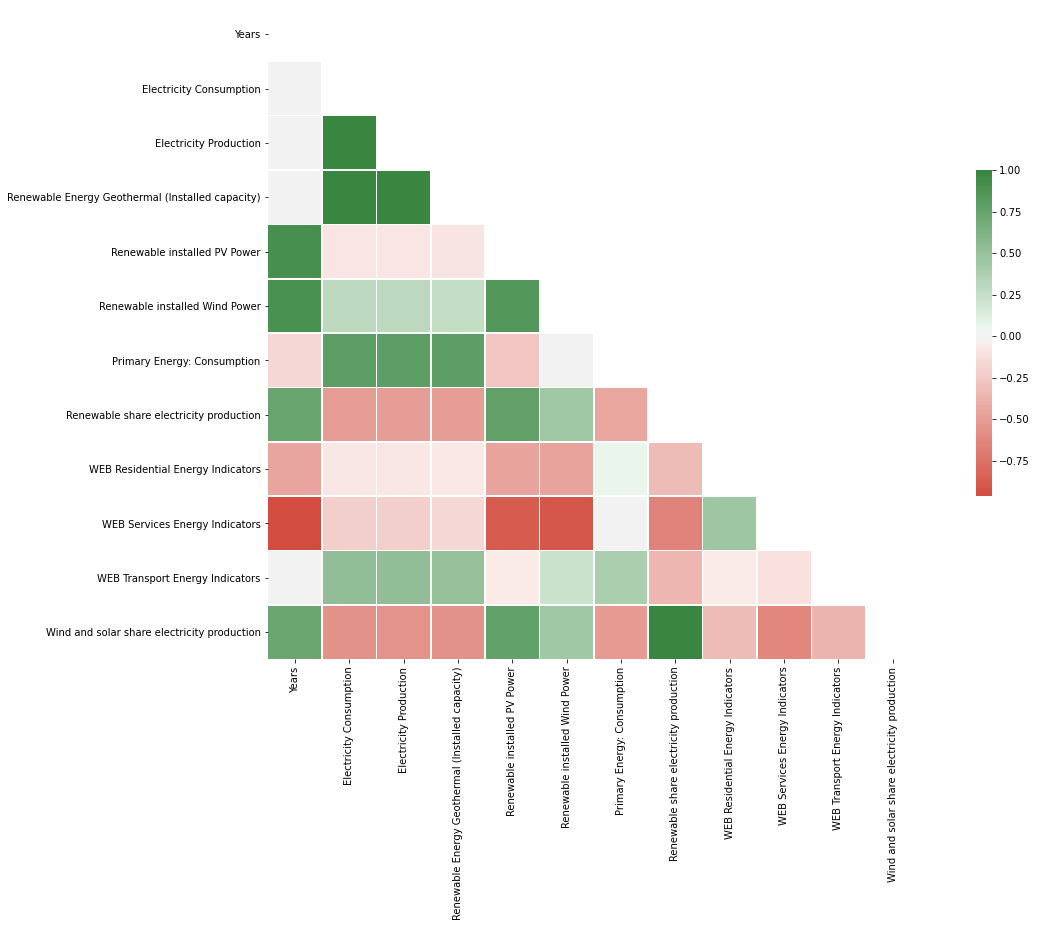

In [7]:
# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(15, 130, as_cmap=True)

#plt.tight_layout()

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Save the figure. must be saved before .show()
fig = sns_plot.get_figure()
fig.savefig("correlogram_rob.png", bbox_inches='tight')



sns_plot